In [ ]:
!pip3 install ipympl
!pip install pyvista
from google.colab import output
output.enable_custom_widget_manager()

%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


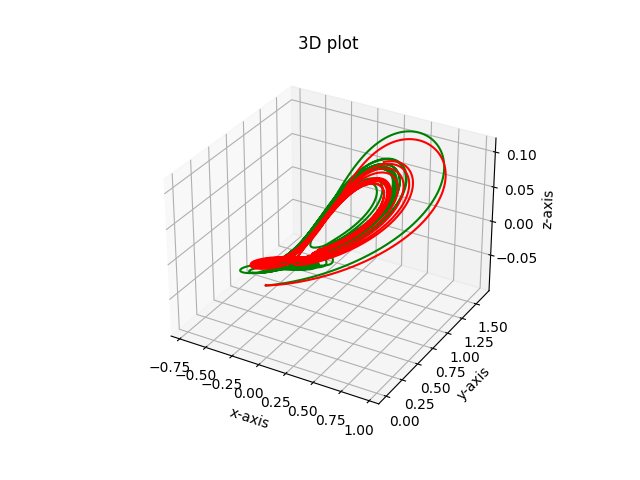

In [ ]:
# Source: https://www.degruyter.com/document/doi/10.1515/zna-1976-1231/pdf
def simulate_lorentz_chaos(x0, y0, z0, interval, timesteps, a, b, c, d):
  tdelta = interval / timesteps
  xpoints = np.zeros((timesteps + 1))
  ypoints = np.zeros((timesteps + 1))
  zpoints = np.zeros((timesteps + 1))
  xpoints[0] = x0
  ypoints[0] = y0
  zpoints[0] = z0
  for i in range(1, timesteps + 1):
    x, y, z = xpoints[i-1], ypoints[i-1], zpoints[i-1]
    dx = x - x * y - z
    dy = x ** 2 - a * y
    dz = b * x - c * z + d
    xpoints[i], ypoints[i], zpoints[i] = x + tdelta * dx, y + tdelta * dy, z + tdelta * dz
  return xpoints, ypoints, zpoints

# Data for a three-dimensional line
X1, Y1, Z1 = simulate_lorentz_chaos(x0=1e-6, y0=1e-2, z0=1e-6, interval=400, timesteps=500000, a=0.1, b=0.08, c=0.38, d=0)
X2, Y2, Z2 = simulate_lorentz_chaos(x0=1e-6, y0=1e-2, z0=1e-6, interval=400, timesteps=500000, a=0.09, b=0.07, c=0.38, d=0)

# creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# creating the plot
ax.plot3D(X1, Y1, Z1, color='green')
plot = ax.plot3D(X2, Y2, Z2, color='red')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()


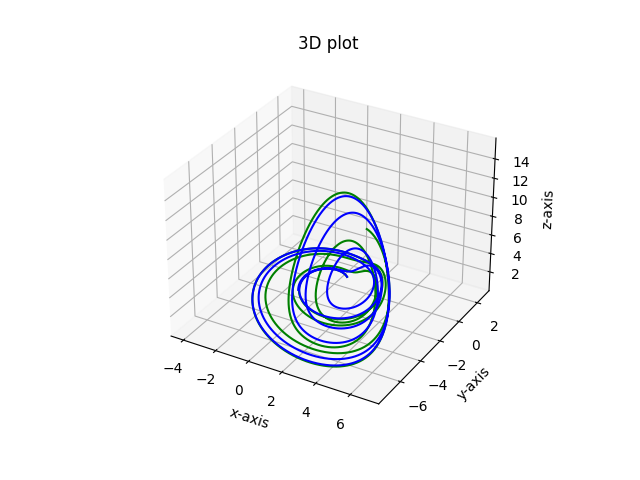

In [ ]:
def simulate_screw_chaos(x0, y0, z0, interval, timesteps, a, b, c):
  tdelta = interval / timesteps
  xpoints = np.zeros((timesteps + 1))
  ypoints = np.zeros((timesteps + 1))
  zpoints = np.zeros((timesteps + 1))
  xpoints[0] = x0
  ypoints[0] = y0
  zpoints[0] = z0
  for i in range(1, timesteps + 1):
    x, y, z = xpoints[i-1], ypoints[i-1], zpoints[i-1]
    dx = - y - z
    dy = x + a * y
    dz = b + x * z - c * z
    xpoints[i], ypoints[i], zpoints[i] = x + tdelta * dx, y + tdelta * dy, z + tdelta * dz
  return xpoints, ypoints, zpoints

# Data for a three-dimensional line
X1, Y1, Z1 = simulate_screw_chaos(x0=0.5, y0=0.5, z0=0.5, interval=30, timesteps=50000, a=0.55, b=2, c=4)
X2, Y2, Z2 = simulate_screw_chaos(x0=0.5, y0=0.5, z0=0.5, interval=30, timesteps=50000, a=0.54, b=2, c=4)

# creating figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X1, Y1, Z1, color='green')
plot = ax.plot3D(X2, Y2, Z2, color='blue')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()

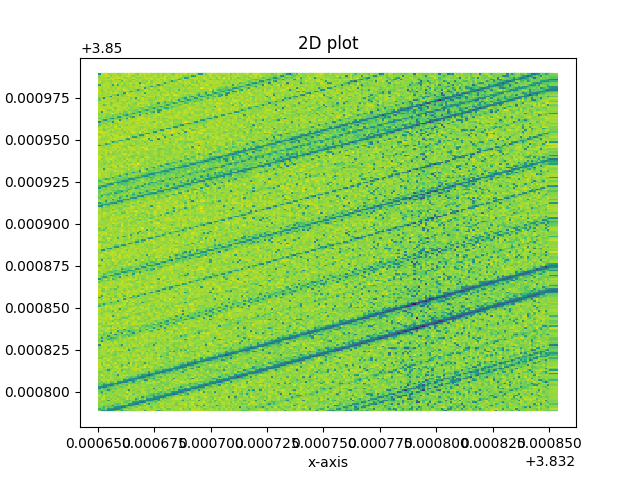

In [ ]:
# https://en.wikipedia.org/wiki/Lyapunov_fractal#Algorithm
# choices should be a string only of "A" and "B"

# failed attempt (lmao): use this code for reference: https://blog.jfrech.com/189/Lyapunov.java
# Some good combos:
# ABABAA, (3.81, 3.87), (3.81, 3.87)
# BBBBBBAAAAAA, (3.4, 4), (2.5, 3.4)
def pick_coord(choices, index, x_coord, y_coord):
  x_coord_picked = choices[index % len(choices)] == 'A'
  if x_coord_picked:
    return x_coord
  else:
    return y_coord

# Calculate lyapunov exponent for logistic map x_{n+1} = r * x_n * (1 - x_n)
def compute_lyapunov_exponent(choices, x_coord, y_coord):
  iterations = 1000
  points = np.zeros((iterations))
  parameters = np.zeros((iterations))
  points[0] = 0.5
  for i in range(1, points.shape[0]):
    parameters[i-1] = pick_coord(choices, i-1, x_coord, y_coord)
    points[i] = parameters[i-1] * points[i-1] * (1 - points[i-1])
  derivatives = parameters * (1 - 2 * points)
  exponent = np.sum(np.log(np.abs(derivatives[1:iterations-1]))) / (iterations - 1)
  return exponent

# choices - string of letters A and B
# interval - tuple that consists of the start and end points from which to sample points
# granularity of grid
# NOTE: interval should always be some value between 0 and 4
def lyapunov_fractal(choices, x_interval, y_interval, nx, ny):
  x_start, x_end = x_interval
  y_start, y_end = y_interval
  x = np.linspace(x_start, x_end, nx)
  y = np.linspace(y_start, y_end, ny)
  x_coord, y_coord = np.meshgrid(x, y)
  index = 0
  parameter = 0
  xpoints = []
  ypoints = []
  exponents = []
  for i in range(nx):
    for j in range(ny):
      exponent = compute_lyapunov_exponent(choices, x_coord[i, j], y_coord[i, j])
      if np.isnan(exponent):
        exponent = 0
      xpoints.append(x_coord[i, j])
      ypoints.append(y_coord[i, j])
      exponents.append(exponent)
  return (xpoints, ypoints, exponents)

central_point = (3.832752, 3.850889)
radius = 0.0001

# central_point = (3.84, 3.84)
# radius = 0.03
x_center, y_center = central_point
x_interval = (x_center - radius, x_center + radius)
y_interval = (y_center - radius, y_center + radius)
point_count = 200
x_coords, y_coords, colors = lyapunov_fractal("ABAAB", x_interval, y_interval, point_count, point_count)

fig = plt.figure()
ax2 = fig.add_subplot()

ax2.scatter(x_coords, y_coords, c=colors, marker='_')

# setting title and labels
ax2.set_title("2D plot")
ax2.set_xlabel('x-axis')
ax2.set_ylabel('y-axis')

# displaying the plot
plt.show()


In [ ]:
exponent_max = np.max(colors)
exponent_min = np.min(colors)
print("Exponent max: ", exponent_max)
print("Exponent min: ", exponent_min)

samples = (colors - exponent_min) / (exponent_max - exponent_min)
print(max(samples), min(samples))

samples = np.array(samples)

threshold = 0.5
lower = 0
upper = 1
half = samples.shape[0] / 2

for i in range(1000):
  if (np.sum(samples < threshold) > half):
    upper = threshold
  else:
    lower = threshold
  threshold = (lower + upper) / 2

print(np.sum(samples < threshold), np.sum(samples > threshold))
samples[samples < threshold] = -1
samples[samples > threshold] = 1

Exponent max:  0.37328532962994415
Exponent min:  -0.4496122577449602
1.0 0.0
20000 19999


In [ ]:
# Taken from https://quantatrisk.com/2015/04/07/walsh-hadamard-transform-python/
import math
from math import *
from scipy.special import ndtr
from scipy.stats import chi, chi2, norm
from scipy.special import gammainc

def info(X,xt,a,b,M):
    print("==================")
    print("Signal\t\tX(t)")
    print("  of length\tn = %d digits" % len(X))
    print("trimmed to\tx(t)")
    print("  of length\tn = %d digits (n=2^%d)" % (a*b,M))
    print("  split into\ta = %d sub-sequences " % a)
    print("\t\tb = %d-digit long" % b)
    print("==================")

def WHT(x):
    # Function computes (slow) Discrete Walsh-Hadamard Transform
    # for any 1D real-valued signal
    # (c) 2015 QuantAtRisk.com, by Pawel Lachowicz
    x=np.array(x)
    if(len(x.shape)<2): # make sure x is 1D array
        if(len(x)>3):   # accept x of min length of 4 elements (M=2)
            # check length of signal, adjust to 2**m
            n=len(x)
            M=trunc(log(n,2))
            x=x[0:2**M]
            h2=np.array([[1,1],[1,-1]])
            for i in range(M-1):
                if(i==0):
                    H=np.kron(h2,h2)
                else:
                    H=np.kron(H,h2)

            return (np.dot(H,x)/2.**M, x, M)
        else:
            print("HWT(x): Array too short!")
            raise SystemExit
    else:
        print("HWT(x): 1D array expected!")
        raise SystemExit

def xsequences(x):
    x=np.array(x)   # X(t) or x(t)
    if(len(x.shape)<2): # make sure x is 1D array
        if(len(x)>3):   # accept x of min length of 4 elements (M=2)
            # check length of signal, adjust to 2**M if needed
            n=len(x)
            M=trunc(log(n,2))
            x=x[0:2**M]
            a=int(2**(M//2))  # a number of adjacent sequences/blocks
            b=(2**M)//a      # a number of elements in each sequence
            y=np.reshape(x,(a,b))
            return (y,x,a,b,M)
        else:
            print("xsequences(x): Array too short!")
            raise SystemExit
    else:
        print("xsequences(x): 1D array expected!")
        raise SystemExit

def tstat(x,a,b,M):
    # specify the probability of occurrence of the digit "1"
    p=0.5
    print("Computation of WHTs...")
    for j in range(a):
        hwt, _, _ = WHT(x[j])
        if(j==0):
            y=hwt
        else:
            y=np.vstack((y,hwt))   # WHT for xseq
    print("  ...completed")
    print("Computation of t-statistics..."),
    t=[];
    for j in range(a):     # over sequences/blocks (rows)
        for i in range(b): # over sequence's elements (columns)
            if(i==0):
                if(p==0.5):
                    m0j=0
                else:
                    m0j=(2.**M/2.)*(1.-2.*p)
                sig0j=((2**M/2)*p*(1.-p)) ** 0.5
                w0j=y[j][i]
                t0j=(w0j-m0j)/sig0j
                t.append(t0j)
            else:
                sigij=((2.**((M+2.)/2.))*p*(1.-p)) ** 0.5
                wij=y[j][i]
                tij=wij/sigij
                t.append(tij)
    t=np.array(t)
    print("completed")
    print("Computation of p-values..."),
    # standardised t-statistics; t_{i,j} ~ N(0,1)
    t=(t-np.mean(t))/(np.std(t))
    # p-values = 1-[1/sqrt(2*pi)*integral[exp(-x**2/2),x=-inf..t]]
    P=1-ndtr(t)
    print("completed\n")
    return(t,P,y)

def WHTStatTest(cl,X):
    (xseq,xt,a,b,M) = xsequences(X)
    if(M<7):
        print("Error:  Signal x(t) too short for WHT Statistical Test")
        print("        Acceptable minimal signal length: n=2^7=128\n")
    else:
        if(M>=7 and M<19):
            print("Warning: Statistically advisable signal length: n=2^19=524288\n")
        print("Test Name: Walsh-Hadamard Transform Statistical Test\n")
        (t, P, _) = tstat(xseq,a,b,M)

def test1(cl,t,a,b,otest):
  alpha=1.-cl/100.
  u1=norm.ppf(alpha/2.)
  u2=norm.ppf(1-alpha/2.)
  Results1=[]
  for l in t:
    if(l<u1 or l>u2):
      Results1.append(0)
    else:
      Results1.append(1)
  nfail=a*b-np.sum(Results1)
  print("Test 1 (Crude Decision)")
  print(" RESULT: %d out of %d test variables stand for " \
        "randomness" % (a*b-nfail,a*b))
  if((a*b-nfail)/float(a*b)>.99):
    print("\t Signal x(t) appears to be random")
  else:
    print("\t Signal x(t) appears to be non-random")
  otest.append(100.*(a*b-nfail)/float(a*b)) # gather per cent of positive results
  print("\t at %.5f%% confidence level" % (100.*(1.-alpha)))
  print
  return(otest)


def test2(cl,P,a,b,otest):
    alpha=1.-cl/100.
    u1=norm.ppf(alpha/2.)
    u2=norm.ppf(1-alpha/2.)
    Results2=[]
    rP=np.reshape(P,(a,b))  # turning P 1D-vector into (a x b) 2D array!
    for j in range(a):
        tmp=rP[j][(rP[j]<alpha)]
        if(len(tmp)>0):
            Results2.append(0)   # fail for sub-sequence
        else:
            Results2.append(1)   # pass

    nfail2=a-np.sum(Results2)  # total number of sub-sequences which failed
    t2=nfail2/float(a)
    print("Test 2 (Proportion of Sequences Passing a Test)")
    b1=alpha*a+sqrt(a*alpha*(1-alpha))*u1
    b2=alpha*a+sqrt(a*alpha*(1-alpha))*u2
    if(t2<b1 or t2>b2):
        print("  RESULT: Signal x(t) appears to be non-random")
        otest.append(0.)
    else:
        print("  RESULT: Signal x(t) appears to be random")
        otest.append(100.)
    print("\t  at %.5f%% confidence level" % (100.*(1.-alpha)))
    return(otest)

def test3(cl,P,a,b,otest):
    alpha=1.-cl/100.
    rP=np.reshape(P,(a,b))
    rPT=rP.T
    Results3=0
    for i in range(b):
        (hist,bin_edges,_)=plt.hist(rPT[i], bins=list(np.arange(0.0,1.1,0.1)))
        F=hist
        K=len(hist)  # K=10 for bins as defined above
        S=a
        chi2_accumulator=0
        for j in range(K):
            chi2_accumulator+=((F[j]-S/K)**2.)/(S/K)
        pvalue=1-gammainc(9/2.,chi2_accumulator/2.)
        if(pvalue>=alpha and chi2_accumulator<=chi2.pdf(alpha,K-1)):
            Results3+=1
    print("Test 3 (Uniformity of p-values)")
    print("  RESULT: %d out of %d test variables stand for randomness"\
          % (Results3,b))
    if((Results3/float(b))>.99):
        print("\t  Signal x(t) appears to be random")
    else:
        print("\t  Signal x(t) appears to be non-random")
    otest.append(100.*(Results3/float(b)))
    print("\t  at %.5f%% confidence level" % (100.*(1.-alpha)))
    return(otest)

def test4(cl,t,a,b,otest):
    alpha=1.-cl/100.
    rt=np.reshape(t,(a,b))
    rtT=rt.T
    Results4=0
    for i in range(b):
        tmp=np.max(rtT[i])
        u1=norm.ppf((alpha/2.)**(1./a))
        u2=norm.ppf((1.-alpha/2.)**(1./a))
        if not(tmp<u1 or tmp>u2):
            Results4+=1
    print("Test 4 (Maximum Value Decision)")
    print("  RESULT: %d out of %d test variables stand for randomness" % (Results4,b))
    if((Results4/float(b))>.99):
        print("\t  Signal x(t) appears to be random")
    else:
        print("\t  Signal x(t) appears to be non-random")
    otest.append(100.*(Results4/float(b)))
    print("\t  at %.5f%% confidence level" % (100.*(1.-alpha)))
    return(otest)

def test5(cl,t,a,b,otest):
    alpha=1.-cl/100.
    rt=np.reshape(t,(a,b))
    rtT=rt.T
    Results5=0
    for i in range(b):
        Ci=0
        for j in range(a):
           Ci+=(rtT[i][j])**2.
        if(Ci<=chi2.pdf(alpha, a)):
            Results5+=1
    print("Test 5 (Sum of Square Decision)")
    print("  RESULT: %d out of %d test variables stand for randomness" % (Results5,b))
    if((Results5/float(b))>.99):
        print("\t  Signal x(t) appears to be random")
    else:
        print("\t  Signal x(t) appears to be non-random")
    otest.append(100.*(Results5/float(b)))
    print("\t  at %.5f%% confidence level" % (100.*(1.-alpha)))
    return(otest)

def overalltest(cl,otest):
    alpha=1.-cl/100.
    print("THE OVERALL RESULT:")
    if(np.mean(otest)>=cl):
        print("   Signal x(t) displays an evidence for RANDOMNESS"),
        T=1
    else:
        print("   Signal x(t) displays an evidence for NON-RANDOMNESS"),
        T=0
    print("at %.5f%% c.l." % (100.*(1.-alpha)))
    print("   based on Walsh-Hadamard Transform Statistical Test\n")
    return(T)


def WHTStatTest(cl,X):
    (xseq,xt,a,b,M) = xsequences(X)
    info(X,xt,a,b,M)
    if(M<7):
        print()
        print("Error:  Signal x(t) too short for WHT Statistical Test")
        print("        Acceptable minimal signal length: n=2^7=128\n")
    else:
        if(M>=7 and M<19):
            print("==================")
            print("Warning: Statistically advisable signal length: n=2^19=524288\n")
        print("==================")
        print("Test Name: Walsh-Hadamard Transform Statistical Test\n")
        (t, P, _) = tstat(xseq,a,b,M)
        otest=test1(cl,P,a,b,[])
        otest=test2(cl,P,a,b,otest)
        # otest=test3(cl,P,a,b,otest)
        otest=test4(cl,t,a,b,otest)
        # otest=test5(cl,t,a,b,otest)
        print(otest)
        T=overalltest(cl,otest)
        return(T)

cl=99
WHTStatTest(cl,samples)


NameError: ignored

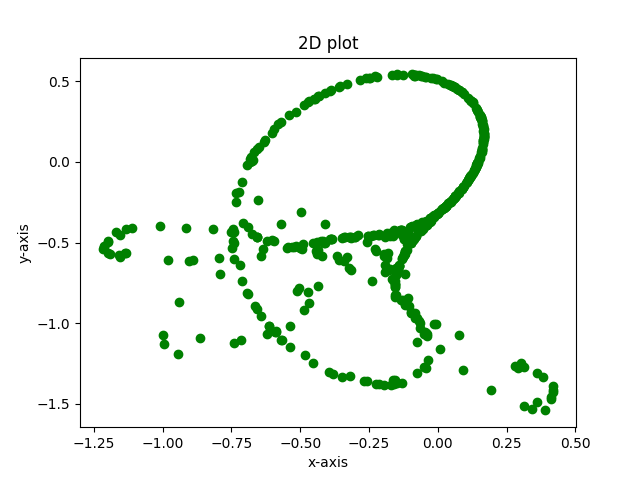

In [ ]:
# https://en.wikipedia.org/wiki/Tinkerbell_map
def tinkerbell_map(x0, y0, timesteps, a, b, c, d):
  xpoints = np.zeros((timesteps + 1))
  ypoints = np.zeros((timesteps + 1))
  xpoints[0] = x0
  ypoints[0] = y0
  for i in range(1, timesteps + 1):
    x, y = xpoints[i-1], ypoints[i-1]
    xpoints[i] = x ** 2 - y ** 2 + a * x + b * y
    ypoints[i] = 2 * x * y + c * x + d * y
  return xpoints, ypoints

# Data for a two-dimensional line
X, Y = tinkerbell_map(x0=-0.72, y0=-0.64, timesteps=500, a=0.9, b=-0.6013, c=2, d=0.5)

# creating figure
fig = plt.figure()
ax = fig.add_subplot()
# Use "plot" for line between adjacent points in time step and we
# can realize that points next to each other are NOT next to each other
ax.scatter(X, Y, color='green')

# setting title and labels
ax.set_title("2D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# displaying the plot
plt.show()

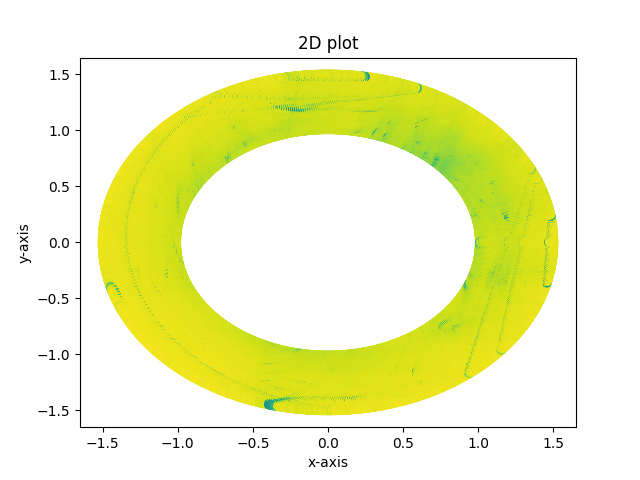

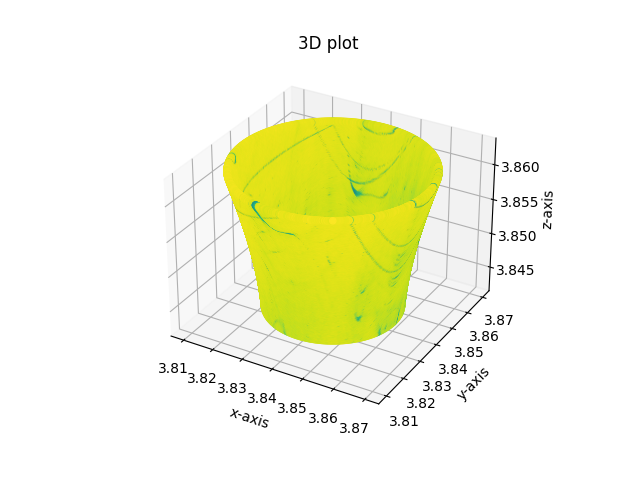

NameError: ignored

In [ ]:
# https://en.wikipedia.org/wiki/Lyapunov_fractal#Algorithm
# choices should be a string only of "A" and "B"

# Calculate lyapunov exponent for logistic map x_{n+1} = r * x_n * (1 - x_n)
# choices: array of indices determining which coordinate index to apply in iteration step (choices contains value from 0 to D-1 inclusive)
# points: a 2D numpy array (N x D) with N points of dimension D
#
# Method returns a list of exponents for each of the points given.
def generalized_lyapunov_fractal(choices, points, iterations=2000):
  current_points = np.ones((points.shape[0])) * 0.5
  sum = np.zeros((points.shape[0]))
  for i in range(0, iterations + 1):
    parameters = points[:, choices[i % len(choices)]]
    new_points = parameters * current_points * (1 - current_points)
    if i != 0:
      sum += np.log(np.abs(parameters * (1 - 2 * current_points)))
    current_points = new_points
  exponent = sum / (iterations - 1)
  return exponent

# Returns the exponents, the gradient, and
# def generalized_lyapunov_manifold(choices, points):

def twod_grid(uinterval, vinterval, nu, nv):
  u_start, u_end = uinterval
  v_start, v_end = vinterval
  u = np.linspace(u_start, u_end, nu)
  v = np.linspace(v_start, v_end, nv)
  u_coords, v_coords = np.meshgrid(u, v)
  coordinate_list = np.zeros((nu * nv, 2))
  for i in range(nu):
    for j in range(nv):
      coordinate_list[i * nv + j, :] = np.array([u_coords[i, j], v_coords[i, j]])
  return coordinate_list

# interval - tuple that consists of the start and end points from which to sample points
# granularity of grid
# NOTE: interval should always be some value between 0 and 4
def twodim_lyapunov(choices, x_interval, y_interval, nx, ny, iterations=2000):
  coords = twod_grid(x_interval, y_interval, nx, ny)
  exponents = generalized_lyapunov_fractal(choices, coords, iterations)
  return (coords[:, 0], coords[:, 1], exponents)

def plot_2d_data(x_coords, y_coords, colors):
  fig = plt.figure()
  ax = fig.add_subplot()

  ax.scatter(x_coords, y_coords, c=colors)

  # setting title and labels
  ax.set_title("2D plot")
  ax.set_xlabel('x-axis')
  ax.set_ylabel('y-axis')

  # displaying the plot
  plt.show()

def plot_3d_data(x_coords, y_coords, z_coords, colors):
  fig = plt.figure()
  ax_3d = fig.add_subplot(111, projection='3d')

  # creating the plot
  ax_3d.scatter(x_coords, y_coords, z_coords, c=colors)

  # setting title and labels
  ax_3d.set_title("3D plot")
  ax_3d.set_xlabel('x-axis')
  ax_3d.set_ylabel('y-axis')
  ax_3d.set_zlabel('z-axis')
  plt.show()

def generate_data_points(twod_coordinatelist, embedding):
  coordinate_list = embedding(twod_coordinatelist[:, 0], twod_coordinatelist[:, 1])
  return coordinate_list

# displaying the plot
def test_twodim_lyapunov():
  central_point = (3.1, 3.1)
  radius = 0.2
  x_center, y_center = central_point
  x_interval = (x_center - radius, x_center + radius)
  y_interval = (y_center - radius, y_center + radius)
  point_count = 200
  x_coords, y_coords, colors = twodim_lyapunov([0, 1], x_interval, y_interval, point_count, point_count)
  plot_2d_data(x_coords, y_coords, colors)

def test_spherical_lyapunov():
  radius = 0.03
  center = np.array([3.84, 3.84, 3.84])
  def embedding(theta, phi):
    location = np.stack((radius * np.sin(theta) * np.cos(phi), radius * np.sin(theta) * np.sin(phi), radius * np.cos(theta)), axis=1) + center
    return location

  theta_interval = (0, 2 * np.pi)
  phi_interval = (0, np.pi)
  twod_points = twod_grid(theta_interval, phi_interval, 600, 600)
  data_points = generate_data_points(twod_points, embedding)
  exponents = generalized_lyapunov_fractal([0, 1, 0, 0, 2, 1, 1, 2], data_points)

  plot_2d_data(twod_points[:, 0], twod_points[:, 1], exponents)
  plot_3d_data(data_points[:, 0], data_points[:, 1], data_points[:, 2], exponents)

  # target = np.max(exponents) - 0.12
  # margin = 0.02
  # mask = np.abs(exponents - target) < margin
  # group = twod_points[mask, :]
  # group_3d = data_points[mask, :]
  # group_colors = exponents[mask]
  # plot_2d_data(group[:, 0], group[:, 1], group_colors)
  # plot_3d_data(group_3d[:, 0], group_3d[:, 1], group_3d[:, 2], group_colors)

def test_hyperboloid_lyapunov():
  translation = np.array([3.84, 3.84, 3.84])
  def embedding(x, y):
    scaling = 0.02
    location = scaling * (np.stack((x, y, np.sqrt(np.square(x) + np.square(y) - 1)), axis=1)) + translation
    return location

  def get_euclidean_coordinates(r, theta):
    euclidean_coords = np.zeros((r.shape[0], 2))
    euclidean_coords[:, 0] = r * np.cos(theta)
    euclidean_coords[:, 1] = r * np.sin(theta)
    return euclidean_coords

  radius_interval = (1.01, 1.5)
  theta_interval = (0, 2 * np.pi)
  twod_points = twod_grid(radius_interval, theta_interval, 600, 600)
  twod_points = get_euclidean_coordinates(twod_points[:, 0], twod_points[:, 1])
  data_points = generate_data_points(twod_points, embedding)
  exponents = generalized_lyapunov_fractal([0, 1, 0, 0, 2, 1, 1, 2], data_points)

  plot_2d_data(twod_points[:, 0], twod_points[:, 1], exponents)
  plot_3d_data(data_points[:, 0], data_points[:, 1], data_points[:, 2], exponents)

  samples = transform_colors_to_samples(exponents)
  cl=99
  WHTStatTest(cl, samples)

# def simulate_lorentz_chaos(x0, y0, z0, interval, timesteps, a, b, c, d):
def simulate_lorentz_trajectory_lyapunov():
  data_points = np.stack(simulate_lorentz_chaos(x0=1e-6, y0=1e-2, z0=1e-6, interval=400, timesteps=500000, a=0.1, b=0.08, c=0.38, d=0), axis=1)
  data_points = data_points / 5 + 3
  exponents = generalized_lyapunov_fractal([0, 1, 0, 0, 2, 1, 1, 2], data_points)
  plot_3d_data(data_points[:, 0], data_points[:, 1], data_points[:, 2], exponents)

# def test_rectangular_prism_lyapunov():
#   import pyvista
#   mesh = pyvista.Box((3.81, 3.87, 3.81, 3.87, 3.81, 3.87), level=600, quads=True)
#   surface = mesh.extract_surface()
#   surface = surface.cell_data_to_point_data().cast_to_pointset().points
#   exponents = generalized_lyapunov_fractal([0, 1, 0, 0, 2, 1, 1, 2], surface)
#   plot_3d_data(surface[:, 0], surface[:, 1], surface[:, 2], exponents)


# test_twodim_lyapunov()
# test_spherical_lyapunov()
test_hyperboloid_lyapunov()
# simulate_lorentz_trajectory_lyapunov()
# test_rectangular_prism_lyapunov()


Signal		X(t)
  of length	n = 501 digits
trimmed to	x(t)
  of length	n = 256 digits (n=2^8)
  split into	a = 16 sub-sequences 
		b = 16-digit long

Test Name: Walsh-Hadamard Transform Statistical Test

Computation of WHTs...
  ...completed
Computation of t-statistics...
completed
Computation of p-values...
completed

Test 1 (Crude Decision)
 RESULT: 256 out of 256 test variables stand for randomness
	 Signal x(t) appears to be random
	 at 99.00000% confidence level
Test 2 (Proportion of Sequences Passing a Test)
  RESULT: Signal x(t) appears to be random
	  at 99.00000% confidence level
Test 4 (Maximum Value Decision)
  RESULT: 15 out of 16 test variables stand for randomness
	  Signal x(t) appears to be non-random
	  at 99.00000% confidence level
[100.0, 100.0, 93.75]
THE OVERALL RESULT:
   Signal x(t) displays an evidence for NON-RANDOMNESS
at 99.00000% c.l.
   based on Walsh-Hadamard Transform Statistical Test



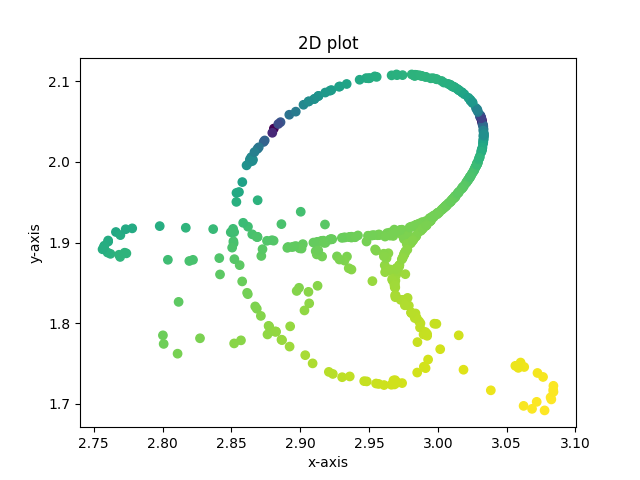

NameError: ignored

In [ ]:
def transform_colors_to_samples(colors):
  exponent_max = np.max(colors)
  exponent_min = np.min(colors)

  samples = (colors - exponent_min) / (exponent_max - exponent_min)
  samples = np.array(samples)

  threshold = 0.5
  lower = 0
  upper = 1
  half = samples.shape[0] / 2

  for i in range(1000):
    if (np.sum(samples < threshold) > half):
      upper = threshold
    else:
      lower = threshold
    threshold = (lower + upper) / 2

  samples[samples < threshold] = -1
  samples[samples > threshold] = 1
  return samples

def generalized_lyapunov_fractal(choices, points, iterations=2000):
  current_points = np.ones((points.shape[0])) * 0.5
  sum = np.zeros((points.shape[0]))
  for i in range(0, iterations + 1):
    parameters = points[:, choices[i % len(choices)]]
    new_points = parameters * current_points * (1 - current_points)
    if i != 0:
      sum += np.log(np.abs(parameters * (1 - 2 * current_points)))
    current_points = new_points
  exponent = sum / (iterations - 1)
  return exponent

def test_lorentz_trajectory_randomness():
  data_points = np.stack(simulate_lorentz_chaos(x0=1e-6, y0=1e-2, z0=1e-6, interval=400, timesteps=500000, a=0.1, b=0.08, c=0.38, d=0), axis=1)
  data_points = data_points / 5 + 3
  exponents = generalized_lyapunov_fractal([0, 1, 0, 0, 2, 1, 1, 2], data_points)
  samples = transform_colors_to_samples(exponents)
  cl=99
  WHTStatTest(cl,samples)

def test_screw_chaos_randomness():
  data_points = np.stack(simulate_screw_chaos(x0=0.5, y0=0.5, z0=0.5, interval=30, timesteps=50000, a=0.55, b=2, c=4), axis=1)
  data_points = data_points / 15 + 3
  exponents = generalized_lyapunov_fractal([0, 1, 2, 2, 1, 1, 0], data_points)
  plot_3d_data(data_points[:, 0], data_points[:, 1], data_points[:, 2], exponents)
  samples = transform_colors_to_samples(exponents)
  cl=99
  WHTStatTest(cl, samples)

def tinkerbell_map(x0, y0, timesteps, a, b, c, d):
  xpoints = np.zeros((timesteps + 1))
  ypoints = np.zeros((timesteps + 1))
  xpoints[0] = x0
  ypoints[0] = y0
  for i in range(1, timesteps + 1):
    x, y = xpoints[i-1], ypoints[i-1]
    xpoints[i] = x ** 2 - y ** 2 + a * x + b * y
    ypoints[i] = 2 * x * y + c * x + d * y
  return xpoints, ypoints

# Data for a two-dimensional line
def test_tinkerbell_map_randomness():
  X, Y = tinkerbell_map(x0=-0.72, y0=-0.64, timesteps=500, a=0.9, b=-0.6013, c=2, d=0.5)
  X, Y = X/5 + 3, Y/5 + 2
  points = np.zeros((X.shape[0], 2))
  points[:, 0] = X
  points[:, 1] = Y
  exponents = generalized_lyapunov_fractal([0, 1, 0, 1, 1], points)
  samples = transform_colors_to_samples(exponents)
  cl=99
  WHTStatTest(cl, samples)
  plot_2d_data(X, Y, exponents)

test_tinkerbell_map_randomness()
test_screw_chaos_randomness()
# test_lorentz_trajectory_randomness()


Predicted gradient:  [[ -0.96601809  -1.30656054]
 [-10.6622722   -5.92338646]
 [ -5.81978046  -3.67188986]]
Expected gradient:  [[ -0.96601826  -1.30656092]
 [-10.6625252   -5.92436418]
 [ -5.81978322  -3.672057  ]]
Predicted hessian:  [[[-8.00264567e-01 -1.15606224e+00]
  [-1.15606224e+00 -2.11475905e+00]]

 [[-5.05478009e+03  8.92935316e+02]
  [ 8.92935316e+02 -1.95504935e+04]]

 [[-5.39777920e+01  3.26107459e+02]
  [ 3.26107459e+02 -3.34280201e+03]]]
Expected hessian:  [[[-8.32667268e-01 -1.11477494e+00]
  [-1.11477494e+00 -2.14073204e+00]]

 [[-5.05487546e+03  8.92945162e+02]
  [ 8.92945162e+02 -1.95504957e+04]]

 [[-5.39863709e+01  3.26118244e+02]
  [ 3.26118244e+02 -3.34280092e+03]]]


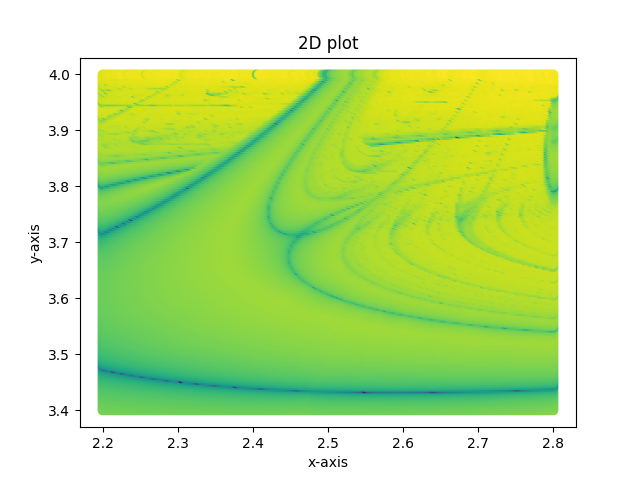

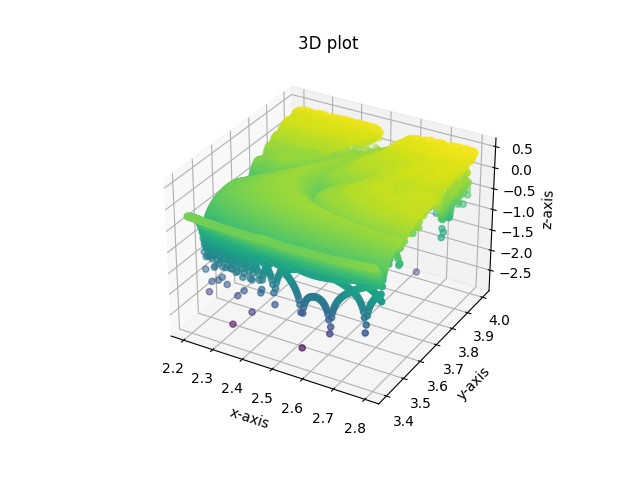

Signal		X(t)
  of length	n = 699 digits
trimmed to	x(t)
  of length	n = 512 digits (n=2^9)
  split into	a = 16 sub-sequences 
		b = 32-digit long

Test Name: Walsh-Hadamard Transform Statistical Test

Computation of WHTs...
  ...completed
Computation of t-statistics...
completed
Computation of p-values...
completed

Test 1 (Crude Decision)
 RESULT: 512 out of 512 test variables stand for randomness
	 Signal x(t) appears to be random
	 at 99.00000% confidence level
Test 2 (Proportion of Sequences Passing a Test)
  RESULT: Signal x(t) appears to be random
	  at 99.00000% confidence level
Test 4 (Maximum Value Decision)
  RESULT: 16 out of 32 test variables stand for randomness
	  Signal x(t) appears to be non-random
	  at 99.00000% confidence level
[100.0, 100.0, 50.0]
THE OVERALL RESULT:
   Signal x(t) displays an evidence for NON-RANDOMNESS
at 99.00000% c.l.
   based on Walsh-Hadamard Transform Statistical Test

Signal		X(t)
  of length	n = 699 digits
trimmed to	x(t)
  of length	n = 51

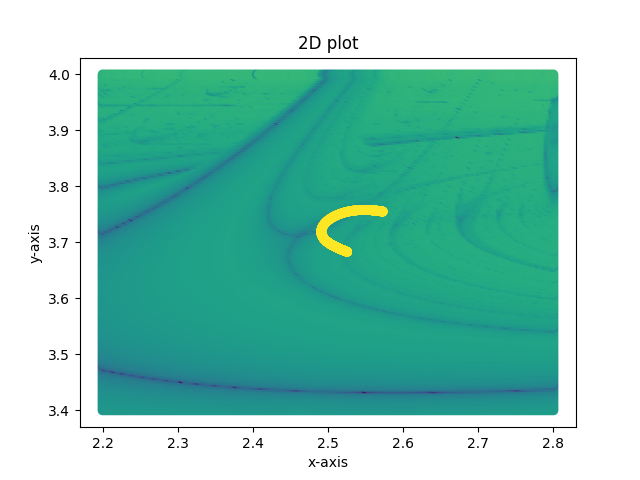

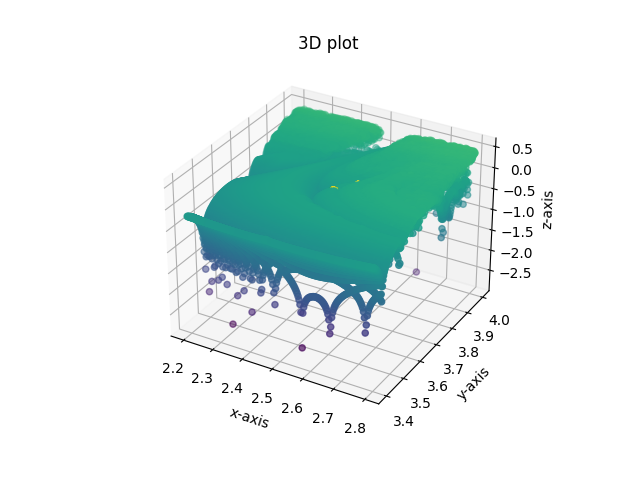

In [ ]:
# @title Generalized Lyapunov Fractals
def generalized_lyapunov_fractal(choices, points, iterations=2000):
  current_points = np.ones((points.shape[0])) * 0.5
  sum = np.zeros((points.shape[0]))
  for i in range(0, iterations + 1):
    parameters = points[:, choices[i % len(choices)]]
    new_points = parameters * current_points * (1 - current_points)
    if i != 0:
      sum += np.log(np.abs(parameters * (1 - 2 * current_points)))
    current_points = new_points
  exponent = sum / (iterations - 1)
  return exponent

# Compute Hessian and gradient with respect to points
def twod_lyapunov_derivatives(choices, points, iterations):
  current_points = np.ones((points.shape[0])) * 0.5
  sum = np.zeros((points.shape[0]))
  exponent_gradient = np.zeros((points.shape[0], 2))
  exponent_hessian = np.zeros((points.shape[0], 2, 2))

  jacobian = np.zeros((points.shape[0], 2))
  hessian = np.zeros((points.shape[0], 2, 2))

  for i in range(0, iterations + 1):
    coordinate_index = choices[i % len(choices)]
    parameters = points[:, coordinate_index]
    new_points = parameters * current_points * (1 - current_points)

    new_jacobian = np.zeros_like(jacobian)
    for k in range(0, 2):
      k_grad = 1 if k == coordinate_index else 0
      new_jacobian[:, k] = k_grad * current_points * (1 - current_points) + parameters * (jacobian[:, k] * (1 - 2 * current_points))

    new_hessian = np.zeros_like(hessian)
    for k1 in range(0, 2):
      for k2 in range(0, 2):
        k1_grad = 1 if k1 == coordinate_index else 0
        k2_grad = 1 if k2 == coordinate_index else 0
        new_hessian[:, k1, k2] = (1 - 2 * current_points) * (k1_grad * jacobian[:, k2] + k2_grad * jacobian[:, k1] + parameters * hessian[:, k1, k2]) - 2 * parameters * jacobian[:, k1] * jacobian[:, k2]

    # print(jacobian, hessian)
    if i != 0:
      common_value = (parameters * (1 - 2 * current_points))
      for k in range(0, 2):
        k_grad = 1 if k == coordinate_index else 0
        # print("K index ", k, " and value ", (1 / common_value) * (k_grad * (1 - 2 * current_points) - 2 * parameters * jacobian[:, k]))
        exponent_gradient[:, k] += ((1 / common_value) * (k_grad * (1 - 2 * current_points) - 2 * parameters * jacobian[:, k]))
      # print(exponent_gradient)
      for k1 in range(0, 2):
        for k2 in range(0, 2):
          k1_grad = 1 if k1 == coordinate_index else 0
          k2_grad = 1 if k2 == coordinate_index else 0
          numerator_component1 = (common_value * (k1_grad * (-2) * jacobian[:, k2] - 2 * k2_grad * jacobian[:, k1] - 2 * parameters * hessian[:, k1, k2]))
          numerator_component2_p1 = (k1_grad * (1 - 2 * current_points) - 2 * parameters * jacobian[:, k1])
          numerator_component2_p2 = (k2_grad * (1 - 2 * current_points) + parameters * (-2) * jacobian[:, k2])
          exponent_hessian[:, k1, k2] += ((1 / (common_value ** 2)) * (numerator_component1 - numerator_component2_p1 * numerator_component2_p2))
    current_points = new_points
    jacobian = new_jacobian
    hessian = new_hessian

  return (exponent_gradient / (iterations - 1), exponent_hessian / (iterations - 1))

def get_gradient_approximation(choices, points, iterations):
  x_direction = np.zeros_like(points)
  x_direction[:, 0] = 1

  y_direction = np.zeros_like(points)
  y_direction[:, 1] = 1

  epsilon = 1e-7
  points_x = points + epsilon * x_direction
  points_y = points + epsilon * y_direction
  colors = generalized_lyapunov_fractal(choices, points, iterations)
  colors_x = generalized_lyapunov_fractal(choices, points_x, iterations)
  colors_y = generalized_lyapunov_fractal(choices, points_y, iterations)
  gradient = np.zeros_like(points)
  gradient[:, 0] = (colors_x - colors) / epsilon
  gradient[:, 1] = (colors_y - colors) / epsilon
  return gradient

def get_hessian_approximation(choices, points, iterations):
  epsilon = 1e-6

  hessian = np.zeros((points.shape[0], points.shape[1], points.shape[1]))

  for i in range(points.shape[1]):
    for j in range(points.shape[1]):
      if i == j:
        delta = np.zeros_like(points)
        delta[:, i] = 1
        points_left = points - epsilon * delta
        points_right = points + epsilon * delta

        colors_left = generalized_lyapunov_fractal(choices, points_left, iterations)
        colors = generalized_lyapunov_fractal(choices, points, iterations)
        colors_right = generalized_lyapunov_fractal(choices, points_right, iterations)
        hessian[:, i, j] = (colors_left + colors_right - 2 * colors) / (epsilon ** 2)
      else:
        delta_both = np.zeros_like(points)
        delta_both[:, i] = 1
        delta_both[:, j] = 1

        offset_points = points - 1/2 * epsilon * delta_both

        delta_i = np.zeros_like(points)
        delta_i[:, i] = 1

        delta_j = np.zeros_like(points)
        delta_j[:, j] = 1

        points_both = offset_points + epsilon * delta_both
        points_i = offset_points + epsilon * delta_i
        points_j = offset_points + epsilon * delta_j

        colors_both = generalized_lyapunov_fractal(choices, points_both, iterations)
        colors_i = generalized_lyapunov_fractal(choices, points_i, iterations)
        colors_j = generalized_lyapunov_fractal(choices, points_j, iterations)
        colors = generalized_lyapunov_fractal(choices, offset_points, iterations)

        hessian[:, i, j] = (colors_both - colors_i - colors_j + colors) / (epsilon ** 2)
  return hessian

def get_christoffel_symbols(gradient, hessian):
  first_fundamental_form = np.zeros((gradient.shape[0], 2, 2))
  for i in range(2):
    for j in range(2):
      first_fundamental_form[:, i, j] = gradient[:, i] * gradient[:, j]
  inverted_fundamental_form = np.linalg.pinv(first_fundamental_form)
  christoffel_symbols = np.zeros((gradient.shape[0], 2, 2, 2))
  for i in range(2):
    for j in range(2):
      values = np.zeros((gradient.shape[0], 2))
      for k in range(2):
        values[:, k] = hessian[:, i, j] * gradient[:, k]
      for point_index in range(gradient.shape[0]):
        christoffel_symbols[point_index, i, j, :] = np.matmul(inverted_fundamental_form[point_index, :, :], values[point_index, :])
  return christoffel_symbols

# We plot a geodesic defined by the embedding (x, y, L(x, y)) where L is the Lyapunov exponent
# points is N x D array
def get_lyapunov_geodesics(choices, points, initial_velocities, timesteps, step_size, iterations=2000):
  trajectories = np.zeros((timesteps + 1, points.shape[0], points.shape[1]))
  velocities = initial_velocities
  trajectories[0, :, :] = points
  for i in range(1, timesteps + 1):
    gradient, hessian = twod_lyapunov_derivatives(choices, points, iterations)
    christoffel_symbols = get_christoffel_symbols(gradient, hessian)
    accelerations = np.zeros_like(velocities)
    accelerations[:, 0] = -1 * (christoffel_symbols[:, 0, 0, 0] * (velocities[:, 0] ** 2) + christoffel_symbols[:, 0, 1, 0] * velocities[:, 0] * velocities[:, 1] + christoffel_symbols[:, 1, 1, 0] * (velocities[:, 1] ** 2))
    accelerations[:, 1] = -1 * (christoffel_symbols[:, 0, 0, 1] * (velocities[:, 0] ** 2) + christoffel_symbols[:, 0, 1, 1] * velocities[:, 0] * velocities[:, 1] + christoffel_symbols[:, 1, 1, 1] * (velocities[:, 1] ** 2))

    adjusted_step_size = step_size / np.sqrt(np.sum(accelerations ** 2, axis=1))
    adjusted_step_size = adjusted_step_size[:, np.newaxis]
    trajectories[i, :, :] = trajectories[i-1, :, :] + adjusted_step_size * velocities + 1/2 * (adjusted_step_size ** 2) * (accelerations)
    velocities = adjusted_step_size * accelerations + velocities
  return trajectories

def check_derivative_values(choices, points, iterations):
  gradient, hessian = twod_lyapunov_derivatives(choices, points, iterations)
  expected_gradient, expected_hessian = get_gradient_approximation(choices, points, iterations), get_hessian_approximation(choices, points, iterations)
  print("Predicted gradient: ", gradient)
  print("Expected gradient: ", expected_gradient)
  print("========================================")
  print("Predicted hessian: ", hessian)
  print("Expected hessian: ", expected_hessian)

def test_derivative_calculations():
  points = np.array([[1.5, 1.6], [2.4, 3.7], [3.1, 3.2]])
  choices = [0, 1, 0, 0, 1, 1, 1]
  iterations = 2000
  check_derivative_values(choices, points, iterations)

# displaying the plot
# def test_twodim_lyapunov_geodesic():
#   points = np.array([[2.5, 2.5], [1.2, 1.2]])
#   initial_velocities = np.array([[-1, 1], [1, 0]])
#   timesteps = 100
#   step_size = 0.001
#   trajectories = get_lyapunov_geodesics([0,1], points, initial_velocities, timesteps, step_size)
#   for i in range(points.shape[0]):
#     colors = generalized_lyapunov_fractal([0,1], trajectories[:timesteps-1, i, :])
#     plot_2d_data(trajectories[:timesteps-1, i, 0], trajectories[:timesteps-1, i, 1], colors)
#     plot_3d_data(trajectories[:timesteps-1, i, 0], trajectories[:timesteps-1, i, 1], colors, colors)

def test_twodim_lyapunov():
  iterations = 500
  central_point = (2.5, 3.7)
  radius = 0.3
  x_center, y_center = central_point
  x_interval = (x_center - radius, x_center + radius)
  y_interval = (y_center - radius, y_center + radius)
  point_count = 200
  x_coords, y_coords, colors = twodim_lyapunov([0, 1], x_interval, y_interval, point_count, point_count, iterations)
  plot_2d_data(x_coords, y_coords, colors)
  plot_3d_data(x_coords, y_coords, colors, colors)

  point_of_interest = [2.5, 3.7]
  points = [point_of_interest for i in range(2)]
  points = np.array(points)
  initial_velocities = np.array([[1, -1], [-1, 1]])

  timesteps = 700
  step_size = 0.007
  trajectories = get_lyapunov_geodesics([0,1], points, initial_velocities, timesteps, step_size, iterations)

  x_all_trajectory_coords = x_coords
  y_all_trajectory_coords = y_coords
  trajectory_colors_2d = colors
  trajectory_colors_3d = colors

  for i in range(points.shape[0]):
    trajectory_colors = np.ones((timesteps-1)) * 2
    line_colors = generalized_lyapunov_fractal([0,1], trajectories[:timesteps-1, i, :])
    x_all_trajectory_coords = np.concatenate((x_all_trajectory_coords, trajectories[:timesteps-1, i, 0]))
    y_all_trajectory_coords = np.concatenate((y_all_trajectory_coords, trajectories[:timesteps-1, i, 1]))
    trajectory_colors_2d = np.concatenate((trajectory_colors_2d, trajectory_colors))
    trajectory_colors_3d = np.concatenate((trajectory_colors_3d, line_colors))

    samples = transform_colors_to_samples(line_colors)
    cl=99
    WHTStatTest(cl, samples)


  trajectory_colors_2d = (trajectory_colors_2d - np.min(trajectory_colors_2d)) / (np.max(trajectory_colors_2d) - np.min(trajectory_colors_2d))
  plot_2d_data(x_all_trajectory_coords, y_all_trajectory_coords, trajectory_colors_2d)
  plot_3d_data(x_all_trajectory_coords, y_all_trajectory_coords, trajectory_colors_3d, trajectory_colors_2d)

test_derivative_calculations()
test_twodim_lyapunov()


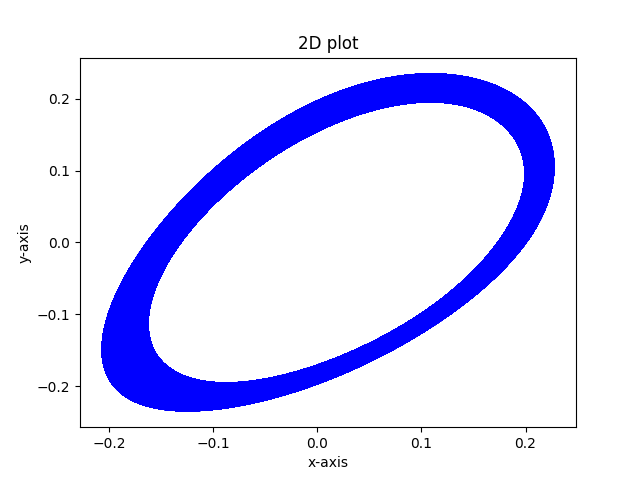

Signal		X(t)
  of length	n = 100001 digits
trimmed to	x(t)
  of length	n = 65536 digits (n=2^16)
  split into	a = 256 sub-sequences 
		b = 256-digit long

Test Name: Walsh-Hadamard Transform Statistical Test

Computation of WHTs...
  ...completed
Computation of t-statistics...
completed
Computation of p-values...
completed

Test 1 (Crude Decision)
 RESULT: 65536 out of 65536 test variables stand for randomness
	 Signal x(t) appears to be random
	 at 99.00000% confidence level
Test 2 (Proportion of Sequences Passing a Test)
  RESULT: Signal x(t) appears to be random
	  at 99.00000% confidence level
Test 4 (Maximum Value Decision)
  RESULT: 22 out of 256 test variables stand for randomness
	  Signal x(t) appears to be non-random
	  at 99.00000% confidence level
[100.0, 100.0, 8.59375]
THE OVERALL RESULT:
   Signal x(t) displays an evidence for NON-RANDOMNESS
at 99.00000% c.l.
   based on Walsh-Hadamard Transform Statistical Test



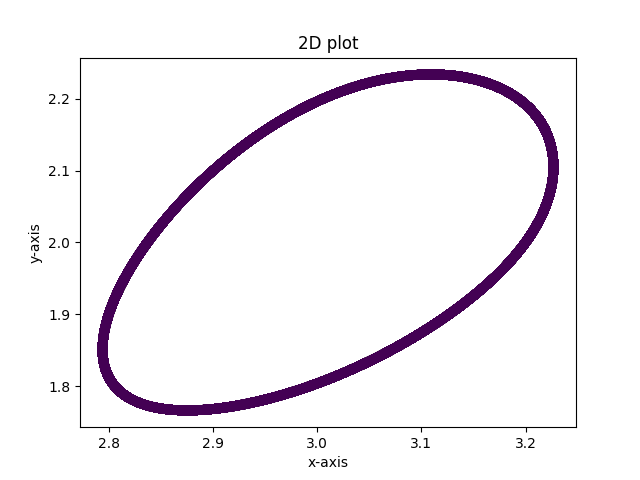

In [ ]:
# https://en.wikipedia.org/wiki/Bogdanov_map
def simulate_bogdanov(x0, y0, timesteps, epsilon, k, mu):
  xpoints = np.zeros((timesteps + 1))
  ypoints = np.zeros((timesteps + 1))
  xpoints[0] = x0
  ypoints[0] = y0
  for i in range(1, timesteps + 1):
    x, y = xpoints[i-1], ypoints[i-1]
    ypoints[i] = y + epsilon * y + k * x * (x - 1) + mu * x * y
    xpoints[i] = x + ypoints[i]
  return xpoints, ypoints

def test_bogdanov_map_randomness():
  X, Y = simulate_bogdanov(x0=-0.1, y0=0.1, timesteps=100000, epsilon=0, k=1.2, mu=0)
  points = np.zeros((X.shape[0], 2))
  points[:, 0] = X + 3
  points[:, 1] = Y + 2
  exponents = generalized_lyapunov_fractal([0, 1], points)
  samples = transform_colors_to_samples(exponents)
  cl=99
  WHTStatTest(cl, samples)
  plot_2d_data(points[:, 0], points[:, 1], np.ones_like(exponents))

# # !pip3 install ipympl
# %matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Data for a three-dimensional line
X, Y = simulate_bogdanov(x0=-0.1, y0=0.1, timesteps=100000, epsilon=0, k=1.2, mu=0)

# creating figure
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(X, Y, color='blue')

# setting title and labels
ax.set_title("2D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')

# displaying the plot
plt.show()
test_bogdanov_map_randomness()

In [ ]:
def cyclically_symmetric_attractor(x0, y0, z0, interval, timesteps, b):
  tdelta = interval / timesteps
  xpoints = np.zeros((timesteps + 1))
  ypoints = np.zeros((timesteps + 1))
  zpoints = np.zeros((timesteps + 1))
  xpoints[0] = x0
  ypoints[0] = y0
  zpoints[0] = z0
  for i in range(1, timesteps + 1):
    x, y, z = xpoints[i-1], ypoints[i-1], zpoints[i-1]
    dx = np.sin(y)- b * x
    dy = np.sin(z) - b * y
    dz = np.sin(x) - b * z
    xpoints[i], ypoints[i], zpoints[i] = x + tdelta * dx, y + tdelta * dy, z + tdelta * dz
  return xpoints, ypoints, zpoints

# Data for a three-dimensional line
X, Y, Z = cyclically_symmetric_attractor(x0=0, y0=-0.01, z0=0.01, interval=10000, timesteps=5000000, b=0.16)
plot_3d_data(X, Y, Z, np.ones_like(X))



In [ ]:
from google.colab import output
output.disable_custom_widget_manager()